<a href="https://colab.research.google.com/github/boriskuchin/MADMO-BASE-2024/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22hw03_regression_models%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа 3. Валидация алгоритмов регрессии

In [ ]:
# Установим нужную версию sklearn
!pip install scikit-learn==1.1

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Импорт базовых библиотек
import numpy as np
import pandas as pd

# Визуализация
import seaborn as sns
import matplotlib.pyplot as plt

# Датасеты
from sklearn.datasets import load_boston  # для регрессии

# Utils
from sklearn.model_selection import train_test_split, cross_val_score

# Модели (регрессия)
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR

# Метрики
from sklearn.metrics import mean_absolute_error, mean_squared_error  # для регрессии

%matplotlib inline

# Регрессия

In [ ]:
# Загрузим данные
data = load_boston()
dir(data)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [ ]:
print(data.DESCR, sep="\n")

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
# Явно "достанем" из данных объекты и метки

X = data.data
y = data.target

print(f'Type X: {type(X)}, X shape: {X.shape}')
print(f'Type y: {type(y)}, y shape: {y.shape}')
print(data.feature_names)

Type X: <class 'numpy.ndarray'>, X shape: (506, 13)
Type y: <class 'numpy.ndarray'>, y shape: (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Задача 1. Подготовка данных

Сконвертируйте набора данных в `pandas.Dataframe`:

In [ ]:
# Ваш код
X = pd.DataFrame(X, columns=data.feature_names)
y = pd.Series(y)

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Задача 2. Обучение моделей с помощью кросс-валидации

Обучите алгоритмы следующие регрессии на наборе данных:
- `sklearn.linear_model.SGDRegressor`
- `sklearn.linear_model.Lasso`
- `sklearn.svm.SVR`

Используйте k-fold кросс-валидацию (`cross_val_score`). Сравните результаты. Для оценки качества алгоритмов используйте `mean_absolute_error`, `mean_squared_error`.

In [ ]:
# Ваш код
from sklearn.linear_model import SGDRegressor, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [ ]:
sdg_regressor = SGDRegressor()
sdg_regressor.fit(scaled_data, y)

SGDRegressor()

In [ ]:
model_SGD = make_pipeline(scaler, sdg_regressor)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error']
scores_SGD = cross_validate(model_SGD, X, y, cv=10, scoring=scoring)

In [ ]:
print(f'SGDRegressor mean_absolute_error = {scores_SGD["test_neg_mean_absolute_error"].mean()}')
print(f'SGDRegressor mean_squared_error = {scores_SGD["test_neg_mean_squared_error"].mean()}')

SGDRegressor mean_absolute_error = -3.9795925826651866
SGDRegressor mean_squared_error = -34.40200284988846


In [ ]:
lasso_regressor = Lasso(alpha = 0.01)
lasso_regressor.fit(scaled_data, y)

Lasso(alpha=0.01)

In [ ]:
model_Lasso = make_pipeline(scaler, lasso_regressor)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error']
scores_Lasso = cross_validate(model_Lasso, X, y, cv=10, scoring=scoring)

In [ ]:
print(f'Lasso mean_absolute_error = {scores_Lasso["test_neg_mean_absolute_error"].mean()}')
print(f'Lasso mean_squared_error = {scores_Lasso["test_neg_mean_squared_error"].mean()}')

Lasso mean_absolute_error = -3.984734772860121
Lasso mean_squared_error = -34.54608711587648


In [ ]:
svr = SVR()
svr.fit(scaled_data, y)

SVR()

In [ ]:
model_SVR = make_pipeline(scaler, svr)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error']
scores_SVR = cross_validate(model_SVR, X, y, cv=10, scoring=scoring)

In [ ]:
print(f'SVR mean_absolute_error = {scores_SVR["test_neg_mean_absolute_error"].mean()}')
print(f'SVR mean_squared_error = {scores_SVR["test_neg_mean_squared_error"].mean()}')

SVR mean_absolute_error = -4.0298657830652305
SVR mean_squared_error = -40.27860137297783


In [ ]:
data_for_plotting = pd.DataFrame(
    {'Model': ['SGD', 'Lasso', 'SVR'],
    'MAE': [scores_SGD["test_neg_mean_absolute_error"].mean(), scores_Lasso["test_neg_mean_absolute_error"].mean(), scores_SVR["test_neg_mean_absolute_error"].mean()],
    'MSE': [scores_SGD["test_neg_mean_squared_error"].mean(), scores_Lasso["test_neg_mean_squared_error"].mean(), scores_SVR["test_neg_mean_squared_error"].mean()]}
)
data_for_plotting.set_index('Model', inplace=True)

<Axes: xlabel='MAE', ylabel='MSE'>

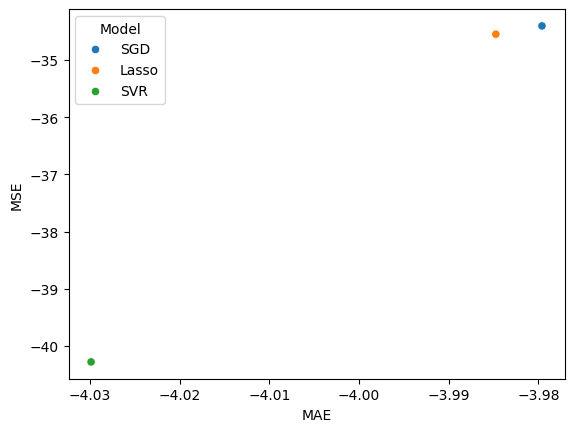

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=data_for_plotting, x="MAE", y="MSE", hue="Model")

# Лучше всего себя показала модель SGD regressor

### Задача 3. Дополнительная валидация

Повторите тоже самое только для Leave-one-out валидации:

>**Info - Leave-one-out валидация**
>
>Leave-one-out валидация - это кросс-валидация с кол-вом фолдов, равным количеству объектов ($K=N$). По сути вы обучаете N раз, каждый раз на N-1 объектах, а затем валидируетесь на оставшемся 1 объекте.
>
>Название класса, который необходим для выполнения этого задания, нужно найти вам самим :)

In [ ]:
# Ваш код
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_train_folds={'SDG':[], 'Lasso':[], 'SVR':[]}
mae_train_folds={'SDG':[], 'Lasso':[], 'SVR':[]}

mse_test_folds={'SDG':[], 'Lasso':[], 'SVR':[]}
mae_test_folds={'SDG':[], 'Lasso':[], 'SVR':[]}

loo = LeaveOneOut()
loo.get_n_splits(X)

for i, (ix_train, ix_test) in enumerate(loo.split(X)):

    sdg_regressor_loo = SGDRegressor()
    sdg_regressor_loo.fit(scaled_data[ix_train, :], y[ix_train])

    lasso_regressor_loo = Lasso(alpha = 0.01)
    lasso_regressor_loo.fit(scaled_data[ix_train, :], y[ix_train])

    svr_loo = SVR()
    svr_loo.fit(scaled_data[ix_train, :], y[ix_train])

    # записываем MSE на train
    mse_train_folds['SDG'].append(mean_squared_error( y[ix_train], sdg_regressor_loo.predict(scaler.transform(X.iloc[ix_train, :]))))

    mse_train_folds['Lasso'].append(mean_squared_error(y[ix_train],lasso_regressor_loo.predict(scaler.transform(X.iloc[ix_train, :]))))
    mse_train_folds['SVR'].append(mean_squared_error(y[ix_train],svr_loo.predict(scaler.transform(X.iloc[ix_train, :]))))

    # записываем MSE на test
    mse_test_folds['SDG'].append(mean_squared_error( y[ix_test], sdg_regressor_loo.predict(scaler.transform(X.iloc[ix_test, :]))))
    mse_test_folds['Lasso'].append(mean_squared_error(y[ix_test],lasso_regressor_loo.predict(scaler.transform(X.iloc[ix_test, :]))))
    mse_test_folds['SVR'].append(mean_squared_error(y[ix_test],svr_loo.predict(scaler.transform(X.iloc[ix_test, :]))))

    # записываем MAE на train
    mae_train_folds['SDG'].append(mean_absolute_error( y[ix_train], sdg_regressor_loo.predict(scaler.transform(X.iloc[ix_train, :]))))
    mae_train_folds['Lasso'].append(mean_absolute_error(y[ix_train],lasso_regressor_loo.predict(scaler.transform(X.iloc[ix_train, :]))))
    mae_train_folds['SVR'].append(mean_absolute_error(y[ix_train],svr_loo.predict(scaler.transform(X.iloc[ix_train, :]))))

    # записываем MAE на test
    mae_test_folds['SDG'].append(mean_absolute_error( y[ix_test], sdg_regressor_loo.predict(scaler.transform(X.iloc[ix_test, :]))))
    mae_test_folds['Lasso'].append(mean_absolute_error(y[ix_test],lasso_regressor_loo.predict(scaler.transform(X.iloc[ix_test, :]))))
    mae_test_folds['SVR'].append(mean_absolute_error(y[ix_test],svr_loo.predict(scaler.transform(X.iloc[ix_test, :]))))



In [ ]:
# смотрим среднее значение
sdg_mse_train_folds = np.mean(mse_train_folds['SDG'])
sdg_mae_train_folds = np.mean(mae_train_folds['SDG'])
lasso_mse_train_folds = np.mean(mse_train_folds['Lasso'])
lasso_mae_train_folds = np.mean(mae_train_folds['Lasso'])
svr_mse_train_folds = np.mean(mse_train_folds['SVR'])
svr_mae_train_folds = np.mean(mae_train_folds['SVR'])

sdg_mse_test_folds = np.mean(mse_test_folds['SDG'])
sdg_mae_test_folds = np.mean(mae_test_folds['SDG'])
lasso_mse_test_folds = np.mean(mse_test_folds['Lasso'])
lasso_mae_test_folds = np.mean(mae_test_folds['Lasso'])
svr_mse_test_folds = np.mean(mse_test_folds['SVR'])
svr_mae_test_folds = np.mean(mae_test_folds['SVR'])

In [ ]:
data_for_plotting_train = pd.DataFrame(
    {'Model': ['SGD', 'Lasso', 'SVR'],
    'MAE': [sdg_mae_train_folds, lasso_mae_train_folds, svr_mae_train_folds],
    'MSE': [sdg_mse_train_folds, lasso_mse_train_folds, svr_mse_train_folds]}
)
data_for_plotting_train.set_index('Model', inplace=True)

data_for_plotting_test = pd.DataFrame(
    {'Model': ['SGD', 'Lasso', 'SVR'],
    'MAE': [sdg_mae_test_folds, lasso_mae_test_folds, svr_mae_test_folds],
    'MSE': [sdg_mse_test_folds, lasso_mse_test_folds, svr_mse_test_folds]}
)
data_for_plotting_test.set_index('Model', inplace=True)



<Axes: xlabel='MAE', ylabel='MSE'>

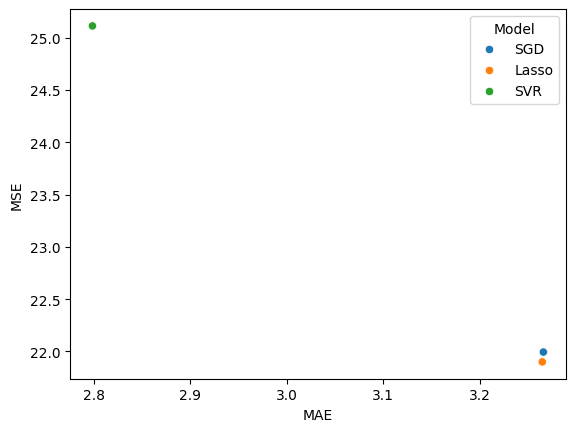

In [ ]:
sns.scatterplot(data=data_for_plotting_train, x="MAE", y="MSE", hue="Model")

<Axes: xlabel='MAE', ylabel='MSE'>

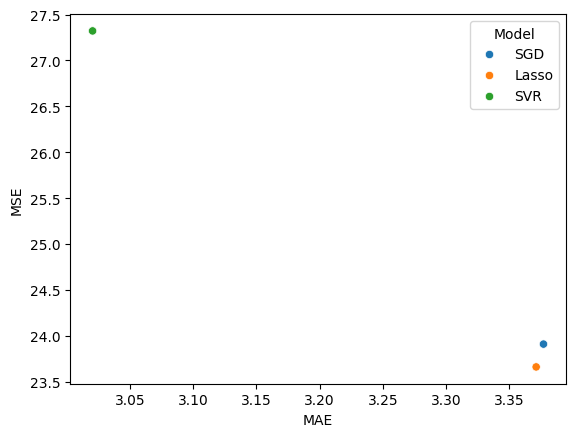

In [ ]:
sns.scatterplot(data=data_for_plotting_test, x="MAE", y="MSE", hue="Model")

### Задача 4. Подбор гиперпараметров

Выберите по два гиперпараметра у каждой модели из приведённых выше. Настройте гиперпараметры алгоритмов при помощи `GridSearchCV`:

>**Примечание**
>
>Выбирайте имеющие смыслы гиперпараметры, которые могут внести ощутимый вклад. Например, не стоит перебирать `random_state`, в этом нет прикладного смысла.

GridSearchCV for lasso


In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

scoring = 'neg_mean_squared_error'

lasso_model = Lasso()
lasso_parameters = {'selection': ['cyclic', 'random'],
                    'alpha': np.linspace(0.001, 1, 10),
                    'max_iter':np.linspace(500, 5000, 5).astype(int)}
lasso_GSCV = GridSearchCV(lasso_model, lasso_parameters,scoring=scoring)
lasso_GSCV.fit(scaled_data, y)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ]),
                         'max_iter': array([ 500, 1625, 2750, 3875, 5000]),
                         'selection': ['cyclic', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_GSCV.best_params_)

{'alpha': 0.112, 'max_iter': 500, 'selection': 'random'}


In [ ]:
lasso_regressor_cv = Lasso(**lasso_GSCV.best_params_)
lasso_regressor_cv.fit(scaled_data, y)

Lasso(alpha=0.112, max_iter=500, selection='random')

In [ ]:
model_Lasso_cv = make_pipeline(scaler, lasso_regressor_cv)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error']
scores_Lasso = cross_validate(model_Lasso_cv, X, y, cv=10, scoring=scoring)

In [ ]:
# Old values
# Lasso mean_absolute_error = -3.984734772860121
# Lasso mean_squared_error = -34.54608711587648
print(f'Lasso mean_absolute_error = {scores_Lasso["test_neg_mean_absolute_error"].mean()}')
print(f'Lasso mean_squared_error = {scores_Lasso["test_neg_mean_squared_error"].mean()}')

Lasso mean_absolute_error = -3.886294480702729
Lasso mean_squared_error = -33.99155362174234


GridSearchCV for SGD


In [ ]:
scoring = 'neg_mean_squared_error'

SGD_model_cv = SGDRegressor()
SGD_parameters = {"penalty":['l2','l1', 'elasticnet'],
                  "alpha": np.linspace(0.0000001, 0.1, 20),
                  "l1_ratio": np.linspace(0, 1, 10)}
SGD_GSCV = GridSearchCV(SGD_model_cv, SGD_parameters, scoring=scoring)
SGD_GSCV.fit(scaled_data, y)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': array([1.00000000e-07, 5.26325263e-03, 1.05264053e-02, 1.57895579e-02,
       2.10527105e-02, 2.63158632e-02, 3.15790158e-02, 3.68421684e-02,
       4.21053211e-02, 4.73684737e-02, 5.26316263e-02, 5.78947789e-02,
       6.31579316e-02, 6.84210842e-02, 7.36842368e-02, 7.89473895e-02,
       8.42105421e-02, 8.94736947e-02, 9.47368474e-02, 1.00000000e-01]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='neg_mean_squared_error')

In [ ]:
print(SGD_GSCV.best_params_)

{'alpha': 0.06315793157894736, 'l1_ratio': 0.2222222222222222, 'penalty': 'l2'}


In [ ]:
sdg_regressor_cv = SGDRegressor(**SGD_GSCV.best_params_)
sdg_regressor_cv.fit(scaled_data, y)

SGDRegressor(alpha=0.06315793157894736, l1_ratio=0.2222222222222222)

In [ ]:
model_SGD_cv = make_pipeline(scaler, sdg_regressor_cv)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error']
scores_SGD_cv = cross_validate(model_SGD_cv, X, y, cv=10, scoring=scoring)

In [ ]:
# Old values
# SGDRegressor mean_absolute_error = -4.003163318448005
# SGDRegressor mean_squared_error = -34.64998102586775
print(f'SGDRegressor mean_absolute_error = {scores_SGD_cv["test_neg_mean_absolute_error"].mean()}')
print(f'SGDRegressor mean_squared_error = {scores_SGD_cv["test_neg_mean_squared_error"].mean()}')

SGDRegressor mean_absolute_error = -3.7953355948863026
SGDRegressor mean_squared_error = -31.942675203625292


GridSearchCV for SVR


In [ ]:
scoring = 'neg_mean_squared_error'

SVR_model_cv = SVR()

SVR_parameters = {"kernel":["linear", "poly", "rbf", "sigmoid"],
                  'degree':np.linspace(1,5,5).astype(int),
                  'C':np.linspace(0.1,5,5)}

SVR_GSCV = GridSearchCV(SVR_model_cv, SVR_parameters, scoring=scoring)
SVR_GSCV.fit(scaled_data, y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': array([0.1  , 1.325, 2.55 , 3.775, 5.   ]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [ ]:
print(SVR_GSCV.best_params_)

{'C': 5.0, 'degree': 1, 'kernel': 'rbf'}


In [ ]:
svr_regressor_cv = SVR(**SVR_GSCV.best_params_)
svr_regressor_cv.fit(scaled_data, y)

SVR(C=5.0, degree=1)

In [ ]:
model_svr_cv = make_pipeline(scaler, svr_regressor_cv)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error']
scores_svr_cv = cross_validate(model_svr_cv, X, y, cv=10, scoring=scoring)

In [ ]:
# Old values
# SVR mean_absolute_error = -4.0298657830652305
# SVR mean_squared_error = -40.27860137297783
print(f'SGDRegressor mean_absolute_error = {scores_svr_cv["test_neg_mean_absolute_error"].mean()}')
print(f'SGDRegressor mean_squared_error = {scores_svr_cv["test_neg_mean_squared_error"].mean()}')

SGDRegressor mean_absolute_error = -3.287444827589313
SGDRegressor mean_squared_error = -27.643291844908315
